<a href="https://colab.research.google.com/github/swapnalisingh13/ADA_Analysis/blob/main/Image_classification_Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image-Based Air Quality Insights from India and Nepal**

### **Importing Libraries**

In [ ]:
#Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#image preprocess & loading
import cv2
from cv2 import imread, resize
#model building
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from keras import layers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
#model metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc, f1_score, roc_curve

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [ ]:
df = pd.read_csv('/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_Nep_AQI_Dataset.csv')

In [ ]:
df.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-9.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
1,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-8.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
2,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-7.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
3,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-6.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
4,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-5.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy


In [ ]:
df.shape

(12240, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   12240 non-null  object 
 1   Filename   12240 non-null  object 
 2   Year       12240 non-null  int64  
 3   Month      12240 non-null  int64  
 4   Day        12240 non-null  int64  
 5   Hour       12240 non-null  object 
 6   AQI        12240 non-null  int64  
 7   PM2.5      12240 non-null  float64
 8   PM10       12240 non-null  float64
 9   O3         11938 non-null  float64
 10  CO         11660 non-null  float64
 11  SO2        10757 non-null  float64
 12  NO2        11800 non-null  float64
 13  AQI_Class  12240 non-null  object 
dtypes: float64(6), int64(4), object(4)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Location        0
Filename        0
Year            0
Month           0
Day             0
Hour            0
AQI             0
PM2.5           0
PM10            0
O3            302
CO            580
SO2          1483
NO2           440
AQI_Class       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(exclude = "object")

,Year,Month,Day,AQI,PM2.5,PM10,O3,CO,SO2,NO2
count,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,11938.000000,11660.000000,10757.000000,11800.000000
mean,2022.947631,2.686111,12.114706,167.626797,142.999267,145.663935,39.491436,101.230361,13.239595,37.843576
std,0.222780,1.774345,8.269053,102.818213,130.745815,104.506951,33.342031,115.910128,9.850507,39.551303
min,2022.000000,2.000000,1.000000,15.000000,4.000000,7.000000,1.000000,0.000000,2.000000,0.670000
25%,2023.000000,2.000000,3.000000,97.000000,35.000000,64.000000,13.000000,4.000000,4.400000,7.000000
50%,2023.000000,2.000000,13.000000,152.000000,70.080000,113.000000,31.000000,52.000000,10.000000,20.000000
75%,2023.000000,3.000000,20.000000,230.000000,257.000000,198.000000,59.660000,174.000000,20.000000,64.000000
max,2023.000000,10.000000,28.000000,450.000000,500.000000,480.000000,225.000000,410.000000,57.000000,169.000000


In [ ]:
df.describe(include = "object")

,Location,Filename,Hour,AQI_Class
count,12240,12240,12240,12240
unique,8,12240,21,6
top,Mumbai,BRI_Un_2023-02-02- 12.00-9.jpg,8:30,c_Unhealthy_for_Sensitive_Groups
freq,2203,1,3300,2863


In [ ]:
print(df['AQI_Class'].unique())

['d_Unhealthy' 'c_Unhealthy_for_Sensitive_Groups' 'b_Moderate' 'a_Good'
 'e_Very_Unhealthy' 'f_Severe']


In [ ]:
df["Location"].unique()

array(['Biratnagar, Nepal', 'Tamil Nadu', 'Mumbai',
       'Knowledge park, Greater Noida', 'New Ind Town, Faridabad',
       'ITO, Delhi', 'Bengaluru', 'Dimapur, Nagaland'], dtype=object)

In [ ]:
df["Hour"].unique()

array(['12:00', '15:00', '17:00', '10:00', '16:00', '8:00', '9:30',
       '14:30', '12:30', '9:00', '13:30', '8:30', '16:30', '15:30',
       '11:30', '13:00', '19:00', '11:00', '18:00', '10:30', '14:00'],
      dtype=object)

### **EDA & Preprocessing**

In [ ]:
aqi_dict = { 'a_Good' : 0 ,
             'b_Moderate' : 1 ,
             'c_Unhealthy_for_Sensitive_Groups' : 2 ,
             'd_Unhealthy' : 3 ,
             'e_Very_Unhealthy' : 4 ,
             'f_Severe' : 5}

df['aqi_id'] = df['AQI_Class'].map(aqi_dict)

In [ ]:
print(df['AQI_Class'].value_counts())
print('Total number of images',len(df))

c_Unhealthy_for_Sensitive_Groups    2863
d_Unhealthy                         2622
e_Very_Unhealthy                    2194
b_Moderate                          1573
a_Good                              1541
f_Severe                            1447
Name: AQI_Class, dtype: int64
Total number of images 12240


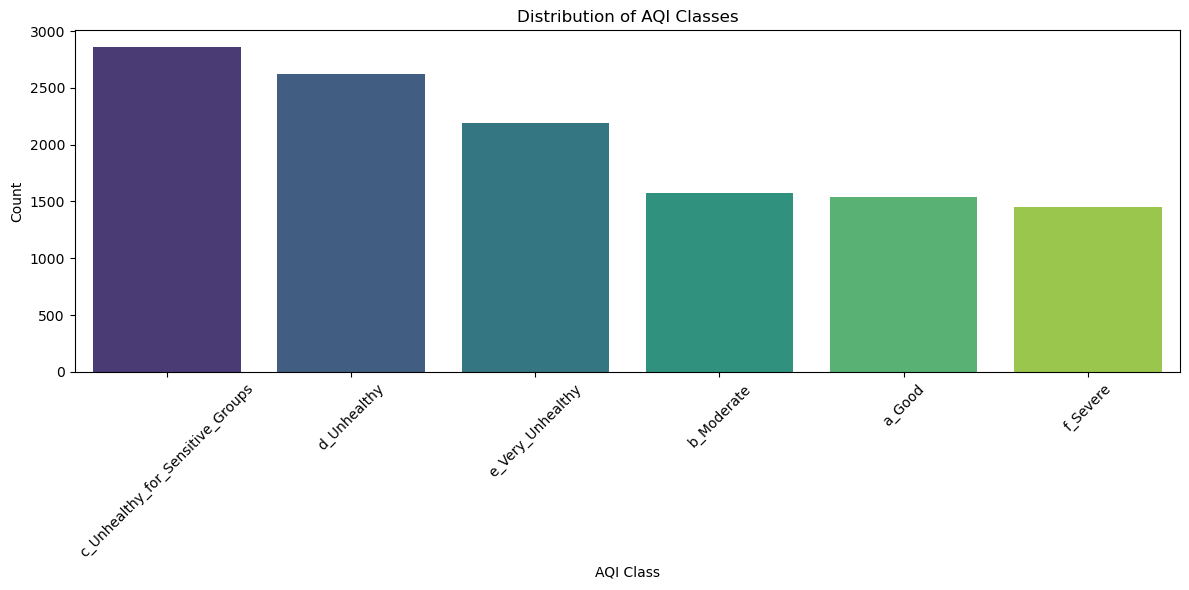

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AQI_Class', data=df, palette='viridis', order=df['AQI_Class'].value_counts().index)
plt.title('Distribution of AQI Classes')
plt.xlabel('AQI Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

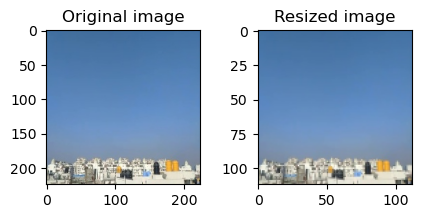

In [ ]:
fname_images = np.array(df['Filename'])
file_to_read ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/BENGR_Good_2023-02-19-08.30-1-20.jpg'

SIZE = 112

img = imread(file_to_read)
img2 = resize(img,(SIZE,SIZE))

plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(img2[:,:,::-1])
plt.title('Resized image')
plt.show()

In [ ]:
X = []
y = []

lista1 = os.listdir('/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/a_Good/')
lista2 = os.listdir('/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/b_Moderate/')
lista3 = os.listdir('/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/c_Unhealthy_for_Sensitive_Groups/')
lista4 = os.listdir('/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/d_Unhealthy/')
lista5 = os.listdir('/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/e_Very_Unhealthy/')
lista6 = os.listdir('/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/f_Severe/')

for i in range(len(lista1)):
    fname_image = lista1[i]
    fname_ID = fname_image.replace('.jpg','')


    file_to_read ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/a_Good/'+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(SIZE,SIZE))
    X.append(img2)

    #targets
    output = np.array(df[df['Filename'] == fname_image].aqi_id)

    y.append(output[0])

    if i % int(100) == 0:
        print(i,'images loaded')

for i in range(len(lista2)):
    fname_image = lista2[i]
    fname_ID = fname_image.replace('.jpg','')


    file_to_read ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/b_Moderate/'+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(SIZE,SIZE))
    X.append(img2)

    #targets
    output = np.array(df[df['Filename'] == fname_image].aqi_id)

    y.append(output[0])

    if i % int(100) == 0:
        print(i,'images loaded')

for i in range(len(lista3)):
    fname_image = lista3[i]
    fname_ID = fname_image.replace('.jpg','')


    file_to_read ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/c_Unhealthy_for_Sensitive_Groups/'+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(SIZE,SIZE))
    X.append(img2)

    #targets
    output = np.array(df[df['Filename'] == fname_image].aqi_id)

    y.append(output[0])

    if i % int(100) == 0:
        print(i,'images loaded')

for i in range(len(lista4)):
    fname_image = lista4[i]
    fname_ID = fname_image.replace('.jpg','')


    file_to_read ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/d_Unhealthy/'+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(SIZE,SIZE))
    X.append(img2)

    #targets
    output = np.array(df[df['Filename'] == fname_image].aqi_id)

    y.append(output[0])

    if i % int(100) == 0:
        print(i,'images loaded')

for i in range(len(lista5)):
    fname_image = lista5[i]
    fname_ID = fname_image.replace('.jpg','')


    file_to_read ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/e_Very_Unhealthy/'+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(SIZE,SIZE))
    X.append(img2)

    #targets
    output = np.array(df[df['Filename'] == fname_image].aqi_id)

    y.append(output[0])

    if i % int(100) == 0:
        print(i,'images loaded')

for i in range(len(lista6)):
    fname_image = lista6[i]
    fname_ID = fname_image.replace('.jpg','')


    file_to_read ='/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/f_Severe/'+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(SIZE,SIZE))
    X.append(img2)

    #targets
    output = np.array(df[df['Filename'] == fname_image].aqi_id)

    y.append(output[0])

    if i % int(100) == 0:
        print(i,'images loaded')

0 images loaded
100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
800 images loaded
900 images loaded
1000 images loaded
1100 images loaded
1200 images loaded
1300 images loaded
1400 images loaded
1500 images loaded
0 images loaded
100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
800 images loaded
900 images loaded
1000 images loaded
1100 images loaded
1200 images loaded
1300 images loaded
1400 images loaded
1500 images loaded
0 images loaded
100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
800 images loaded
900 images loaded
1000 images loaded
1100 images loaded
1200 images loaded
1300 images loaded
1400 images loaded
1500 images loaded
1600 images loaded
1700 images loaded
1800 images loaded
1900 images loaded
2000 images loaded
2100 images loaded
2200 image

### **Models**

In [ ]:
X = np.array(X)
y = np.array(y)

y_train = to_categorical(y, num_classes=6)

#training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.20, random_state=42,stratify=y)

In [ ]:
X.shape

(12240, 112, 112, 3)

In [ ]:
y_id = np.array(df['aqi_id'])

class_weights = np.around(compute_class_weight(class_weight='balanced',classes=np.unique(y_id),y=y),2)
class_weights = dict(zip(np.unique(y_id),class_weights))

print(class_weights)

{0: 1.32, 1: 1.3, 2: 0.71, 3: 0.78, 4: 0.93, 5: 1.41}


 **Efficient-Net**

In [ ]:
SIZE = 112

pre_trained_model = tf.keras.applications.EfficientNetB7(include_top=False,
                                                      input_shape=(SIZE, SIZE, 3),
                                                      weights='imagenet')

# Freeze the first layer and make the rest trainable
for layer in pre_trained_model.layers[:-1]:
    layer.trainable = False
for layer in pre_trained_model.layers[1:]:
    layer.trainable = True

# Build the final model by adding the custom layers
model = tf.keras.models.Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

258076736/258076736 [==============================] - 1s 0us/step


In [ ]:
batch_size = 16
epochs = 7
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
metrics = [tf.keras.metrics.AUC(),tf.keras.metrics.Precision() , tf.keras.metrics.Recall()]
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy' , metrics])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 4, 4, 2560)       64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2622464   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Image DataGenearotor Code
datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)
datagen.fit(X_train)

In [ ]:
# Training the model 1 using ImageDataGenerator and class weights
history=model.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/7


2024-08-15 08:52:14.394262: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


306/306 [==============================] - 147s 362ms/step - loss: 1.5589 - accuracy: 0.3455 - auc: 0.7031 - precision: 0.7132 - recall: 0.0747 - val_loss: 0.9358 - val_accuracy: 0.6818 - val_auc: 0.9314 - val_precision: 0.8652 - val_recall: 0.4011
Epoch 2/7
306/306 [==============================] - 105s 343ms/step - loss: 0.7180 - accuracy: 0.7167 - auc: 0.9448 - precision: 0.8188 - recall: 0.5769 - val_loss: 0.3445 - val_accuracy: 0.8868 - val_auc: 0.9879 - val_precision: 0.9173 - val_recall: 0.8382
Epoch 3/7
306/306 [==============================] - 105s 342ms/step - loss: 0.3201 - accuracy: 0.8814 - auc: 0.9869 - precision: 0.9059 - recall: 0.8537 - val_loss: 0.1559 - val_accuracy: 0.9502 - val_auc: 0.9962 - val_precision: 0.9603 - val_recall: 0.9375
Epoch 4/7
306/306 [==============================] - 105s 342ms/step - loss: 0.1801 - accuracy: 0.9354 - auc: 0.9952 - precision: 0.9456 - recall: 0.9253 - val_loss: 0.0902 - val_accuracy: 0.9706 - val_auc: 0.9982 - val_precision: 0.

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred , axis = 1)
print(y_pred_labels)

77/77 [==============================] - 11s 74ms/step
[3 5 1 ... 0 5 1]


In [ ]:
y_pred_df=pd.DataFrame(data=y_pred_labels,columns=['predicted'])
y_pred_df.to_csv('EfficientNetb7_80.csv')

In [ ]:

print("EffecientNetB7 Model")
# Convert the one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Calculate the F1 score
f1_score_value = f1_score(y_true_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1_score_value)

# Calculate True Positives (TP)
TP = np.sum((y_pred_labels == 1) & (y_true_labels == 1))

# Calculate True Negatives (TN)
TN = np.sum((y_pred_labels == 0) & (y_true_labels == 0))

# Calculate False Positives (FP)
FP = np.sum((y_pred_labels == 1) & (y_true_labels == 0))

# Calculate False Negatives (FN)
FN = np.sum((y_pred_labels == 0) & (y_true_labels == 1))

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

EffecientNetB7 Model
F1 Score: 0.9869305184725542
Sensitivity (Recall): 0.9840764331210191
Specificity: 0.9869706840390879


**ResNet-50**

In [ ]:
#pretrained model resnet
pre_trained_model2 = ResNet50(include_top=False,
                             input_shape=(SIZE, SIZE, 3),
                             weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Freeze the layers as needed (freeze all except the last few layers)
for layer in pre_trained_model2.layers[:-1]:
    layer.trainable = False
for layer in pre_trained_model2.layers[1:]:
    layer.trainable = True

#model building
model2 = tf.keras.models.Sequential([
    pre_trained_model2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

In [ ]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
metrics = [tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics])
#Printing the model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Training the model 2 using ImageDataGenerator and class weights
history2 = model2.fit(datagen.flow(X_train, y_train), epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/7
306/306 [==============================] - 39s 102ms/step - loss: 1.0912 - accuracy: 0.5733 - auc_1: 0.8714 - precision_1: 0.7129 - recall_1: 0.4418 - val_loss: 0.4588 - val_accuracy: 0.8252 - val_auc_1: 0.9788 - val_precision_1: 0.8777 - val_recall_1: 0.7651
Epoch 2/7
306/306 [==============================] - 30s 98ms/step - loss: 0.3638 - accuracy: 0.8638 - auc_1: 0.9845 - precision_1: 0.8901 - recall_1: 0.8322 - val_loss: 0.1910 - val_accuracy: 0.9244 - val_auc_1: 0.9960 - val_precision_1: 0.9349 - val_recall_1: 0.9146
Epoch 3/7
306/306 [==============================] - 31s 100ms/step - loss: 0.2045 - accuracy: 0.9227 - auc_1: 0.9944 - precision_1: 0.9374 - recall_1: 0.9098 - val_loss: 0.2948 - val_accuracy: 0.8881 - val_auc_1: 0.9905 - val_precision_1: 0.9007 - val_recall_1: 0.8819
Epoch 4/7
306/306 [==============================] - 30s 99ms/step - loss: 0.1559 - accuracy: 0.9420 - auc_1: 0.9965 - precision_1: 0.9518 - recall_1: 0.9357 - val_loss: 0.1726 - val_accuracy

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred_labels2 = np.argmax(y_pred2, axis=1)
print(y_pred_labels2)

y_pred_df2 = pd.DataFrame(data=y_pred_labels2, columns=['predicted'])
y_pred_df2.to_csv('ResNet50_80.csv')

77/77 [==============================] - 2s 18ms/step
[3 5 1 ... 0 5 1]


In [ ]:
print("Resnet Model")
# F1 Score Calculation
y_true_labels2 = np.argmax(y_test, axis=1)
f1_score_value2 = f1_score(y_true_labels2, y_pred_labels2, average='weighted')
print("F1 Score:", f1_score_value2)

# Sensitivity and Specificity Calculations
TP = np.sum((y_pred_labels2 == 1) & (y_true_labels2 == 1))
TN = np.sum((y_pred_labels2 == 0) & (y_true_labels2 == 0))
FP = np.sum((y_pred_labels2 == 1) & (y_true_labels2 == 0))
FN = np.sum((y_pred_labels2 == 0) & (y_true_labels2 == 1))

sensitivity2 = TP / (TP + FN)
specificity2 = TN / (TN + FP)

print("Sensitivity (Recall):", sensitivity2)
print("Specificity:", specificity2)

Resnet Model
F1 Score: 0.9722219376092646
Sensitivity (Recall): 1.0
Specificity: 0.9573770491803278


**VGG -19**

In [ ]:
#VGG19
SIZE = 112

# Load the pre-trained VGG19 model
pre_trained_model3 = tf.keras.applications.VGG19(include_top=False,
                                                input_shape=(SIZE, SIZE, 3),
                                                weights='imagenet')

# Freeze the first layers and make the rest trainable
for layer in pre_trained_model3.layers[:-1]:
    layer.trainable = False
for layer in pre_trained_model3.layers[1:]:
    layer.trainable = True

# Build the final model by adding your custom layers
model3 = tf.keras.models.Sequential([
    pre_trained_model3,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
metrics = [tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics])


# Print a summary of the model architecture
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                      

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Training the model 3 using ImageDataGenerator and class weights
history3=model3.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/7
306/306 [==============================] - 34s 99ms/step - loss: 1.8863 - accuracy: 0.1569 - auc_2: 0.5061 - precision_2: 0.2439 - recall_2: 0.0031 - val_loss: 1.7919 - val_accuracy: 0.1287 - val_auc_2: 0.5000 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/7
306/306 [==============================] - 30s 96ms/step - loss: 1.7915 - accuracy: 0.1379 - auc_2: 0.4951 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.7919 - val_accuracy: 0.1287 - val_auc_2: 0.5000 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/7
306/306 [==============================] - 29s 96ms/step - loss: 1.7915 - accuracy: 0.1429 - auc_2: 0.4979 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 1.7917 - val_accuracy: 0.1793 - val_auc_2: 0.5000 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/7
306/306 [==============================] - 30s 97ms/step - loss: 1.7915 - accuracy: 0.1618 - auc_2: 0.4963 - precision_2: 0.0000e+00 - recall_2

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred_labels3 = np.argmax(y_pred3 , axis = 1)
print(y_pred_labels3)

77/77 [==============================] - 2s 22ms/step
[3 3 3 ... 3 3 3]


In [ ]:
y_pred_df3=pd.DataFrame(data=y_pred_labels3,columns=['predicted'])
y_pred_df3.to_csv('VGG16_pred.csv')

In [ ]:
print("VGG19 Model")
# F1 Score Calculation
y_true_labels3 = np.argmax(y_test, axis=1)
f1_score_value3 = f1_score(y_true_labels3, y_pred_labels3, average='weighted')
print("F1 Score:", f1_score_value3)

# Sensitivity and Specificity Calculations
TP = np.sum((y_pred_labels3 == 1) & (y_true_labels3 == 1))
TN = np.sum((y_pred_labels3 == 0) & (y_true_labels3 == 0))
FP = np.sum((y_pred_labels3 == 1) & (y_true_labels3 == 0))
FN = np.sum((y_pred_labels3 == 0) & (y_true_labels3 == 1))

# Prevent division by zero
if (TP + FN) > 0:
    sensitivity3 = TP / (TP + FN)
else:
    sensitivity3 = 0

if (TN + FP) > 0:
    specificity3 = TN / (TN + FP)
else:
    specificity3 = 0

print("Sensitivity (Recall):", sensitivity3)
print("Specificity:", specificity3)

VGG19 Model
F1 Score: 0.07548007987403127
Sensitivity (Recall): 0
Specificity: 0


**Inception V3**

In [ ]:
# Define the input image size
SIZE = 112

# Load the pre-trained InceptionV3 model
pre_trained_model4 = tf.keras.applications.InceptionV3(include_top=False,
                                                      input_shape=(SIZE, SIZE, 3),
                                                      weights='imagenet')

# Freeze the first layers and make the rest trainable
for layer in pre_trained_model4.layers[:-1]:
    layer.trainable = False
for layer in pre_trained_model4.layers[1:]:
    layer.trainable = True

# Build the final model by adding your custom layers
model4 = tf.keras.models.Sequential([
    pre_trained_model4,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
metrics = [tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics])

# Print a summary of the model architecture
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                      

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Training the model 4 using ImageDataGenerator and class weights
history4 = model4.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/7
306/306 [==============================] - 41s 106ms/step - loss: 1.4000 - accuracy: 0.4153 - auc_3: 0.7751 - precision_3: 0.6713 - recall_3: 0.1833 - val_loss: 0.8839 - val_accuracy: 0.6744 - val_auc_3: 0.9248 - val_precision_3: 0.7893 - val_recall_3: 0.4469
Epoch 2/7
306/306 [==============================] - 30s 99ms/step - loss: 0.6335 - accuracy: 0.7378 - auc_3: 0.9540 - precision_3: 0.8125 - recall_3: 0.6500 - val_loss: 0.3235 - val_accuracy: 0.8811 - val_auc_3: 0.9884 - val_precision_3: 0.9128 - val_recall_3: 0.8464
Epoch 3/7
306/306 [==============================] - 30s 99ms/step - loss: 0.3717 - accuracy: 0.8567 - auc_3: 0.9836 - precision_3: 0.8882 - recall_3: 0.8209 - val_loss: 0.2137 - val_accuracy: 0.9203 - val_auc_3: 0.9941 - val_precision_3: 0.9358 - val_recall_3: 0.9044
Epoch 4/7
306/306 [==============================] - 30s 98ms/step - loss: 0.2637 - accuracy: 0.9043 - auc_3: 0.9902 - precision_3: 0.9204 - recall_3: 0.8884 - val_loss: 0.1759 - val_accuracy:

In [ ]:
y_pred4 = model4.predict(X_test)
y_pred_labels4 = np.argmax(y_pred4 , axis = 1)
print(y_pred_labels4)

77/77 [==============================] - 2s 16ms/step
[3 5 0 ... 0 5 1]


In [ ]:
y_pred_df4=pd.DataFrame(data=y_pred_labels4,columns=['predicted'])
y_pred_df4.to_csv('Inception.csv')

In [ ]:
print("Inception Model")
# F1 Score Calculation
y_true_labels4 = np.argmax(y_test, axis=1)
f1_score_value4 = f1_score(y_true_labels4, y_pred_labels4, average='weighted')
print("F1 Score:", f1_score_value4)

# Sensitivity and Specificity Calculations
TP = np.sum((y_pred_labels4 == 1) & (y_true_labels4 == 1))
TN = np.sum((y_pred_labels4 == 0) & (y_true_labels4 == 0))
FP = np.sum((y_pred_labels4 == 1) & (y_true_labels4 == 0))
FN = np.sum((y_pred_labels4 == 0) & (y_true_labels4 == 1))

# Prevent division by zero
if (TP + FN) > 0:
    sensitivity4 = TP / (TP + FN)
else:
    sensitivity4 = 0

if (TN + FP) > 0:
    specificity4 = TN / (TN + FP)
else:
    specificity4 = 0

print("Sensitivity (Recall):", sensitivity4)
print("Specificity:", specificity4)

Inception Model
F1 Score: 0.9688598835109151
Sensitivity (Recall): 0.9640522875816994
Specificity: 0.9768211920529801


**Xception**

In [ ]:
# Define the input image size
SIZE = 112

# Load the pre-trained Xception model
pre_trained_model5 = tf.keras.applications.Xception(include_top=False,
                                                   input_shape=(SIZE, SIZE, 3),
                                                   weights='imagenet')

# Freeze the first layers and make the rest trainable
for layer in pre_trained_model5.layers[:-1]:
    layer.trainable = False
for layer in pre_trained_model5.layers[1:]:
    layer.trainable = True

# Build the final model by adding your custom layers
model5 = tf.keras.models.Sequential([
    pre_trained_model5,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])


83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
metrics = [tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics])

# Print a summary of the model architecture
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                      

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Training the model 5 using ImageDataGenerator and class weights
history5 = model5.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/7
306/306 [==============================] - 38s 105ms/step - loss: 1.5371 - accuracy: 0.3550 - auc_4: 0.7093 - precision_4: 0.7282 - recall_4: 0.1067 - val_loss: 0.9351 - val_accuracy: 0.6479 - val_auc_4: 0.9184 - val_precision_4: 0.8486 - val_recall_4: 0.4167
Epoch 2/7
306/306 [==============================] - 30s 99ms/step - loss: 0.7476 - accuracy: 0.7021 - auc_4: 0.9396 - precision_4: 0.8388 - recall_4: 0.5597 - val_loss: 0.3690 - val_accuracy: 0.8652 - val_auc_4: 0.9859 - val_precision_4: 0.9065 - val_recall_4: 0.8203
Epoch 3/7
306/306 [==============================] - 30s 98ms/step - loss: 0.3163 - accuracy: 0.8760 - auc_4: 0.9878 - precision_4: 0.9080 - recall_4: 0.8436 - val_loss: 0.1689 - val_accuracy: 0.9367 - val_auc_4: 0.9962 - val_precision_4: 0.9447 - val_recall_4: 0.9289
Epoch 4/7
306/306 [==============================] - 30s 99ms/step - loss: 0.1807 - accuracy: 0.9339 - auc_4: 0.9952 - precision_4: 0.9448 - recall_4: 0.9215 - val_loss: 0.1159 - val_accuracy:

In [ ]:
y_pred5 = model5.predict(X_test)
y_pred_labels5 = np.argmax(y_pred5 , axis = 1)
print(y_pred_labels5)

77/77 [==============================] - 2s 20ms/step
[3 5 1 ... 0 5 1]


In [ ]:
y_pred_df5=pd.DataFrame(data=y_pred_labels5,columns=['predicted'])
y_pred_df5.to_csv('Xception.csv')

In [ ]:
print("Xception Model")
# F1 Score Calculation
y_true_labels5 = np.argmax(y_test, axis=1)
f1_score_value5 = f1_score(y_true_labels5, y_pred_labels5, average='weighted')
print("F1 Score:", f1_score_value5)

# Sensitivity and Specificity Calculations
TP = np.sum((y_pred_labels5 == 1) & (y_true_labels5 == 1))
TN = np.sum((y_pred_labels5 == 0) & (y_true_labels5 == 0))
FP = np.sum((y_pred_labels5 == 1) & (y_true_labels5 == 0))
FN = np.sum((y_pred_labels5 == 0) & (y_true_labels5 == 1))

# Prevent division by zero
if (TP + FN) > 0:
    sensitivity5 = TP / (TP + FN)
else:
    sensitivity5 = 0

if (TN + FP) > 0:
    specificity5 = TN / (TN + FP)
else:
    specificity5 = 0

print("Sensitivity (Recall):", sensitivity5)
print("Specificity:", specificity5)

Xception Model
F1 Score: 0.9852927053942675
Sensitivity (Recall): 0.9968253968253968
Specificity: 0.9934426229508196


### **Models Comparison metrics**

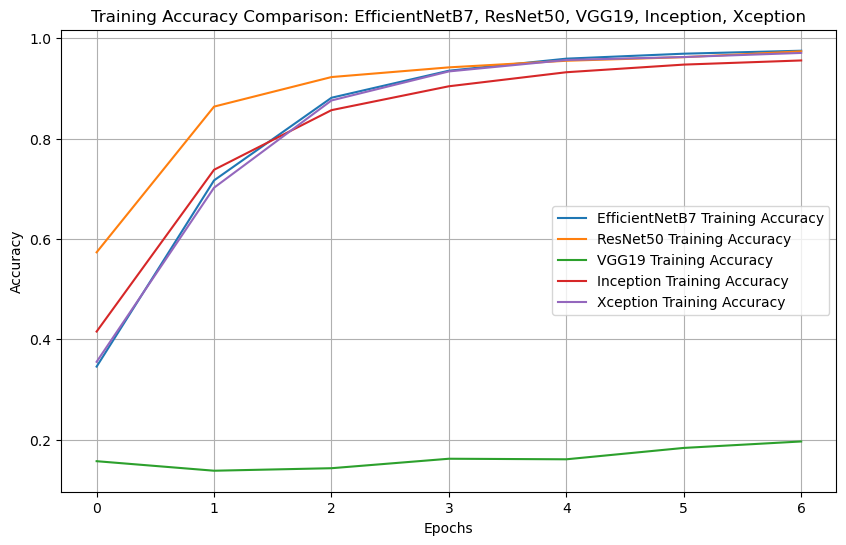

In [ ]:
# Extracting training accuracy for EfficientNet and ResNet
effnet_train_accuracy = history.history['accuracy']
resnet_train_accuracy = history2.history['accuracy']
vgg_train_accuracy = history3.history['accuracy']
incept_train_accuracy = history4.history['accuracy']
xcept_train_accuracy = history5.history['accuracy']


# Plotting the training accuracy for both models
plt.figure(figsize=(10, 6))
plt.plot(effnet_train_accuracy, label='EfficientNetB7 Training Accuracy')
plt.plot(resnet_train_accuracy, label='ResNet50 Training Accuracy')
plt.plot(vgg_train_accuracy, label='VGG19 Training Accuracy')
plt.plot(incept_train_accuracy, label='Inception Training Accuracy')
plt.plot(xcept_train_accuracy, label='Xception Training Accuracy')
plt.title('Training Accuracy Comparison: EfficientNetB7, ResNet50, VGG19, Inception, Xception')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

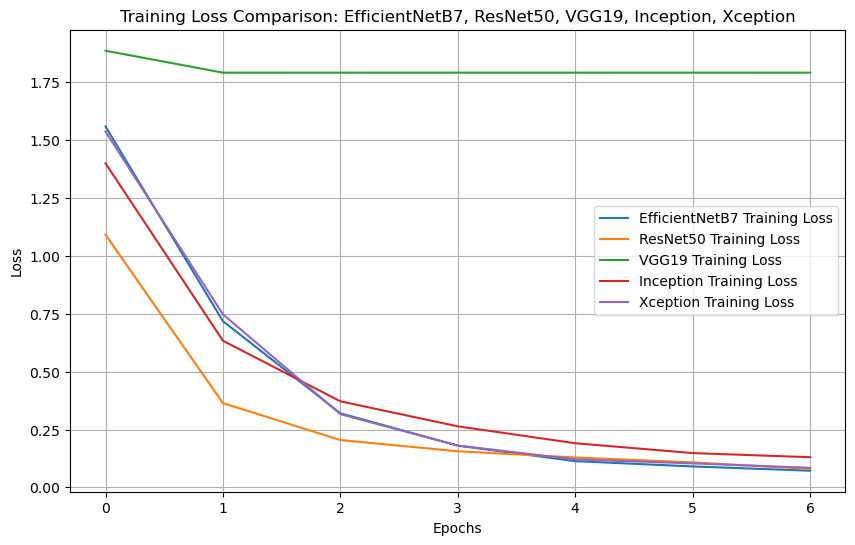

In [ ]:
# Extracting training loss for EfficientNet and ResNet
effnet_train_l = history.history['loss']
resnet_train_l = history2.history['loss']
vgg_train_l = history3.history['loss']
incept_train_l = history4.history['loss']
xcept_train_l = history5.history['loss']

# Plotting the training loss for both models
plt.figure(figsize=(10, 6))
plt.plot(effnet_train_l, label='EfficientNetB7 Training Loss')
plt.plot(resnet_train_l, label='ResNet50 Training Loss')
plt.plot(vgg_train_l, label='VGG19 Training Loss')
plt.plot(incept_train_l, label='Inception Training Loss')
plt.plot(xcept_train_l, label='Xception Training Loss')
plt.title('Training Loss Comparison: EfficientNetB7, ResNet50, VGG19, Inception, Xception')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

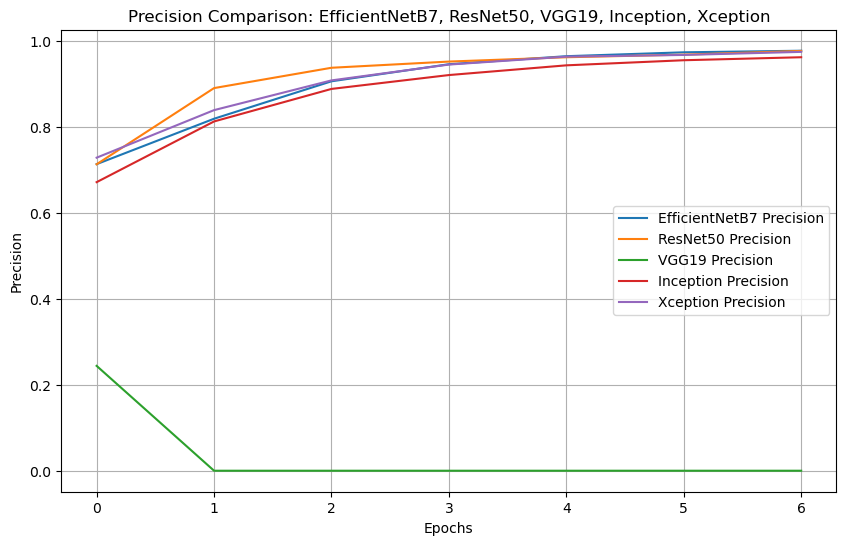

In [ ]:
# Extracting precision for EfficientNet and ResNet
effnet_precision = history.history['precision']
resnet_precision = history2.history['precision_1']
vgg_precision = history3.history['precision_2']
incept_precision = history4.history['precision_3']
xcept_precision = history5.history['precision_4']

# Plotting the precision for both models
plt.figure(figsize=(10, 6))
plt.plot(effnet_precision, label='EfficientNetB7 Precision')
plt.plot(resnet_precision, label='ResNet50 Precision')
plt.plot(vgg_precision, label='VGG19 Precision')
plt.plot(incept_precision, label='Inception Precision')
plt.plot(xcept_precision, label='Xception Precision')
plt.title('Precision Comparison: EfficientNetB7, ResNet50, VGG19, Inception, Xception')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

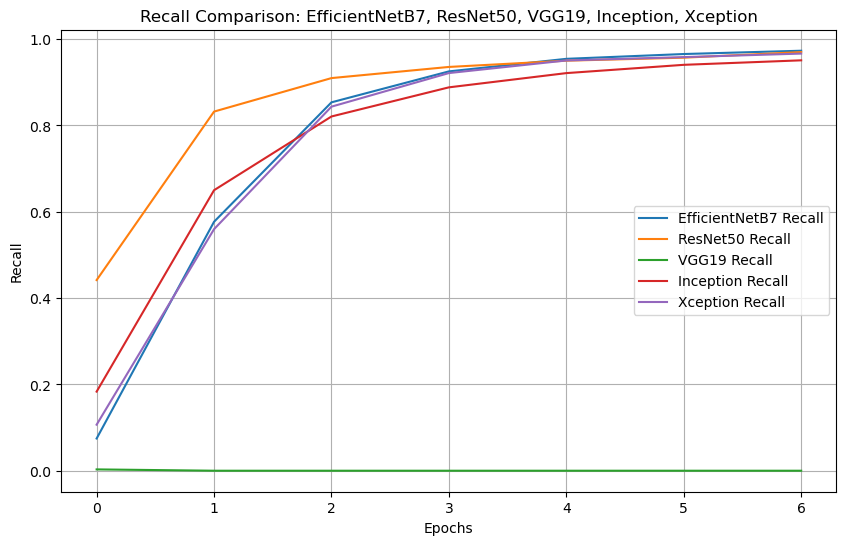

In [ ]:
# Extracting recall for EfficientNet, ResNet, VGG19, Inception & Xception
effnet_recall = history.history['recall']
resnet_recall = history2.history['recall_1']
vgg_recall = history3.history['recall_2']
incept_recall = history4.history['recall_3']
xcept_recall = history5.history['recall_4']

# Plotting the recall for both models
plt.figure(figsize=(10, 6))
plt.plot(effnet_recall, label='EfficientNetB7 Recall')
plt.plot(resnet_recall, label='ResNet50 Recall')
plt.plot(vgg_recall, label='VGG19 Recall')
plt.plot(incept_recall, label='Inception Recall')
plt.plot(xcept_recall, label='Xception Recall')
plt.title('Recall Comparison: EfficientNetB7, ResNet50, VGG19, Inception, Xception')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

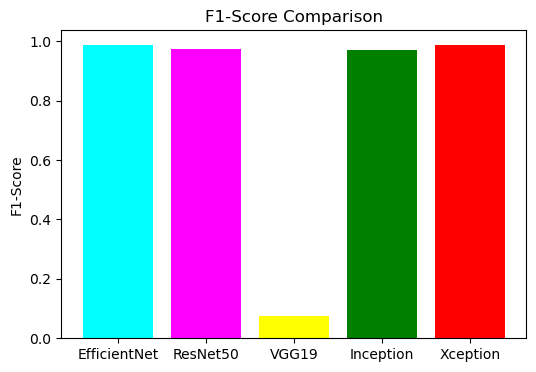

In [ ]:
colors =['cyan', 'magenta','yellow','green','red']
#Plotting F1-Score
plt.figure(figsize=(6, 4))
plt.bar(['EfficientNet', 'ResNet50','VGG19','Inception','Xception'], [f1_score_value, f1_score_value2,f1_score_value3, f1_score_value4, f1_score_value5], color=colors)
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.show()

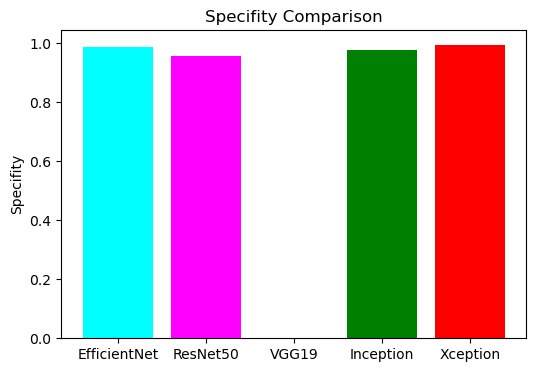

In [ ]:
colors =['cyan', 'magenta','yellow','green','red']
#Plotting Specifity
plt.figure(figsize=(6, 4))
plt.bar(['EfficientNet', 'ResNet50','VGG19','Inception','Xception'], [specificity, specificity2,specificity3, specificity4, specificity5], color=colors)
plt.title('Specifity Comparison')
plt.ylabel('Specifity')
plt.show()

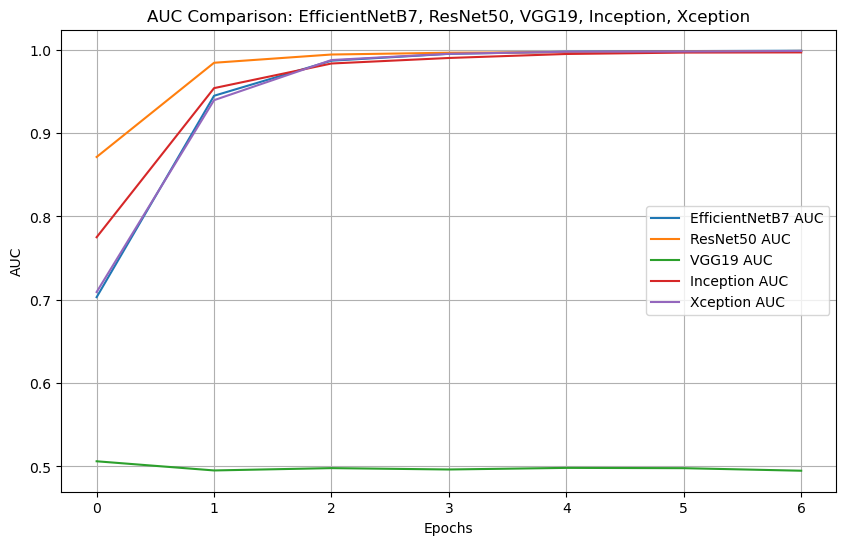

In [ ]:
# Extracting AUC for EfficientNet, ResNet, VGG19, Inception & Xception
effnet_auc = history.history['auc']
resnet_auc = history2.history['auc_1']
vgg_auc = history3.history['auc_2']
incpt_auc = history4.history['auc_3']
xcept_auc = history5.history['auc_4']

# Plotting the AUC for both models
plt.figure(figsize=(10, 6))
plt.plot(effnet_auc, label='EfficientNetB7 AUC')
plt.plot(resnet_auc, label='ResNet50 AUC')
plt.plot(vgg_auc, label='VGG19 AUC')
plt.plot(incpt_auc, label='Inception AUC')
plt.plot(xcept_auc, label='Xception AUC')
plt.title('AUC Comparison: EfficientNetB7, ResNet50, VGG19, Inception, Xception')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get predictions for both models
y_pred_effnet = np.argmax(history.model.predict(X_test), axis=1)
y_pred_resnet = np.argmax(history2.model.predict(X_test), axis=1)
y_pred_vgg = np.argmax(history3.model.predict(X_test), axis=1)
y_pred_incept = np.argmax(history4.model.predict(X_test), axis=1)
y_pred_xcept = np.argmax(history5.model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate MSE
mse_effnet = mean_squared_error(y_true, y_pred_effnet)
mse_resnet = mean_squared_error(y_true, y_pred_resnet)
mse_vgg = mean_squared_error(y_true, y_pred_vgg)
mse_incept = mean_squared_error(y_true, y_pred_incept)
mse_xcept = mean_squared_error(y_true, y_pred_xcept)

# Calculate MAE
mae_effnet = mean_absolute_error(y_true, y_pred_effnet)
mae_resnet = mean_absolute_error(y_true, y_pred_resnet)
mae_vgg = mean_absolute_error(y_true, y_pred_vgg)
mae_incept = mean_absolute_error(y_true, y_pred_incept)
mae_xcept = mean_absolute_error(y_true, y_pred_xcept)

# Calculate RMSE
rmse_effnet = np.sqrt(mse_effnet)
rmse_resnet = np.sqrt(mse_resnet)
rmse_vgg = np.sqrt(mse_vgg)
rmse_incept = np.sqrt(mse_incept)
rmse_xcept = np.sqrt(mse_xcept)

# Print the results
print(f"EfficientNetB7 - MSE: {mse_effnet}, MAE: {mae_effnet}, RMSE: {rmse_effnet}")
print(f"ResNet50 - MSE: {mse_resnet}, MAE: {mae_resnet}, RMSE: {rmse_resnet}")
print(f"VGG19 - MSE: {mse_vgg}, MAE: {mae_vgg}, RMSE: {rmse_vgg}")
print(f"Inception- MSE: {mse_incept}, MAE: {mae_incept}, RMSE: {rmse_incept}")
print(f"Xception - MSE: {mse_xcept}, MAE: {mae_xcept}, RMSE: {rmse_xcept}")

77/77 [==============================] - 2s 20ms/step
EfficientNetB7 - MSE: 0.051879084967320264, MAE: 0.02165032679738562, RMSE: 0.22776980697037144
ResNet50 - MSE: 0.06944444444444445, MAE: 0.03839869281045752, RMSE: 0.26352313834736496
VGG19 - MSE: 2.5326797385620914, MAE: 1.2843137254901962, RMSE: 1.5914395177203848
Inception- MSE: 0.06209150326797386, MAE: 0.04084967320261438, RMSE: 0.24918166719880067
Xception - MSE: 0.05310457516339869, MAE: 0.025326797385620915, RMSE: 0.2304442994812384


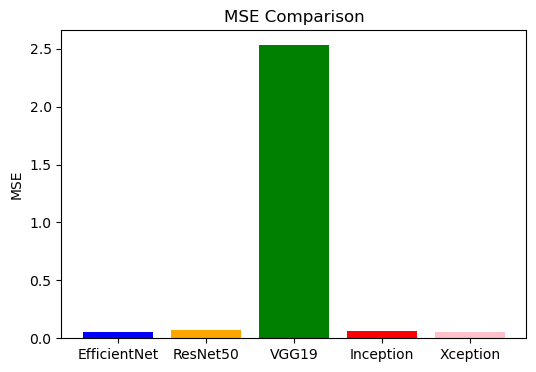

In [ ]:
colors =['blue', 'orange','green','red','pink']
# Plotting MSE
plt.figure(figsize=(6, 4))
plt.bar(['EfficientNet', 'ResNet50','VGG19','Inception','Xception'], [mse_effnet, mse_resnet, mse_vgg, mse_incept, mse_xcept], color=colors)
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.show()

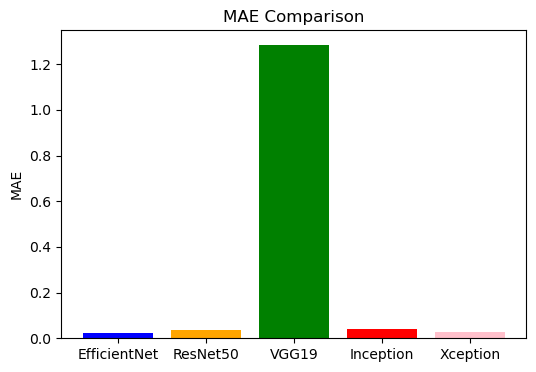

In [ ]:
# Plotting MAE
plt.figure(figsize=(6, 4))
plt.bar(['EfficientNet', 'ResNet50','VGG19','Inception','Xception'], [mae_effnet, mae_resnet,mae_vgg, mae_incept, mae_xcept], color=colors)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.show()

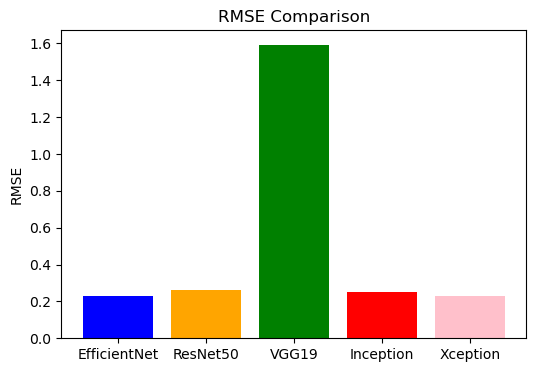

In [ ]:
# Plotting RMSE
plt.figure(figsize=(6, 4))
plt.bar(['EfficientNet', 'ResNet50','VGG19','Inception','Xception'], [rmse_effnet, rmse_resnet, rmse_vgg, rmse_incept, rmse_xcept], color=colors)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# Convert predictions to one-hot encoded format
y_pred_effnet_prob = history.model.predict(X_test)
y_pred_resnet_prob = history2.model.predict(X_test)
y_pred_vgg_prob = history3.model.predict(X_test)
y_pred_incept_prob = history4.model.predict(X_test)
y_pred_xcept_prob = history5.model.predict(X_test)

# Plot ROC curve for each class
def plot_roc_curve(y_true, y_pred_prob, model_name):
    plt.figure(figsize=(12, 8))
    for i in range(y_test.shape[1]):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
    plt.title(f'{model_name} ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

77/77 [==============================] - 2s 20ms/step


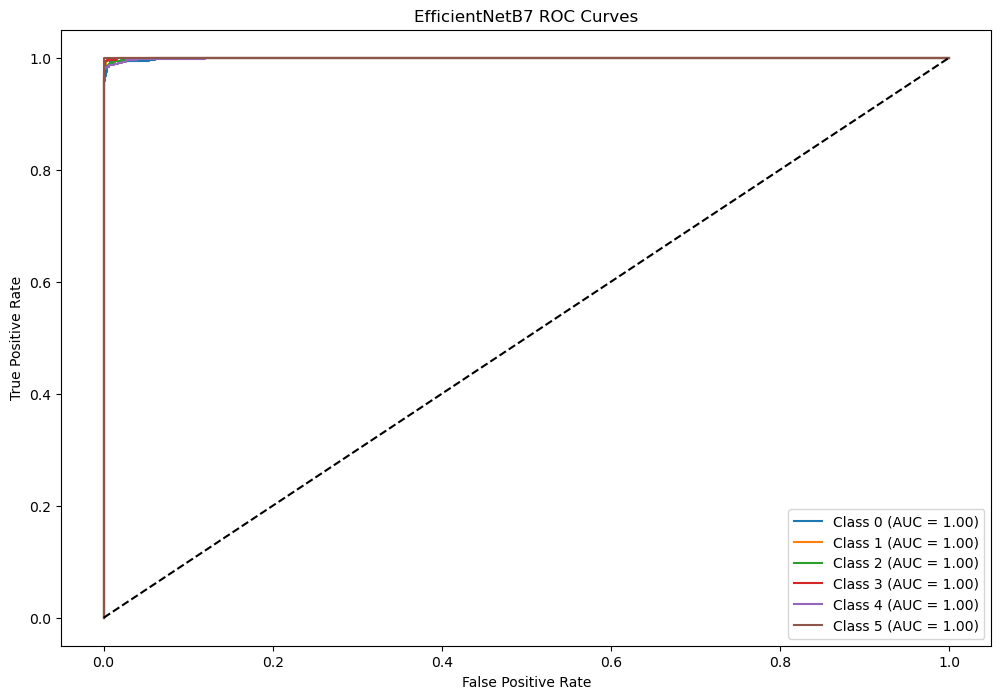

In [ ]:
# Plot ROC for EfficientNetB7
plot_roc_curve(y_test, y_pred_effnet_prob, 'EfficientNetB7')

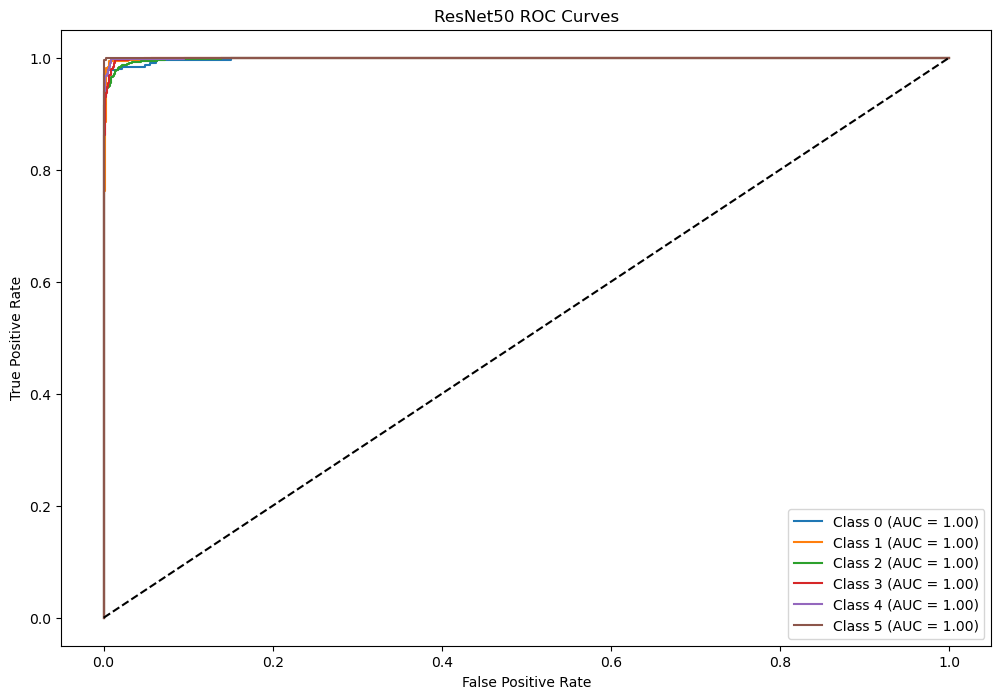

In [ ]:
# Plot ROC for ResNet50
plot_roc_curve(y_test, y_pred_resnet_prob, 'ResNet50')

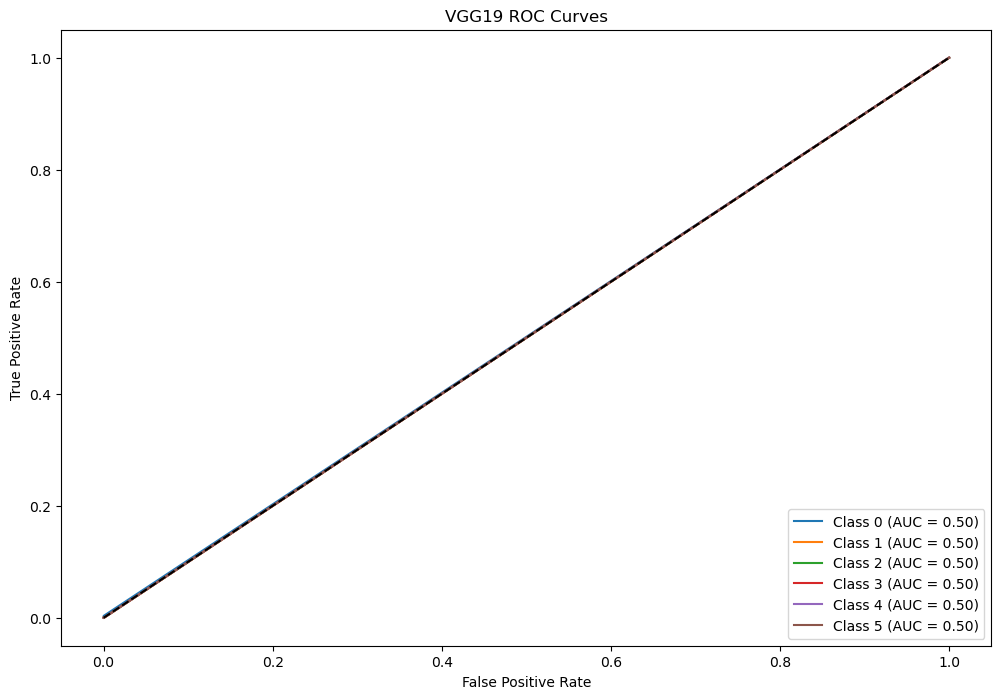

In [ ]:
# Plot ROC for VGG19
plot_roc_curve(y_test, y_pred_vgg_prob, 'VGG19')

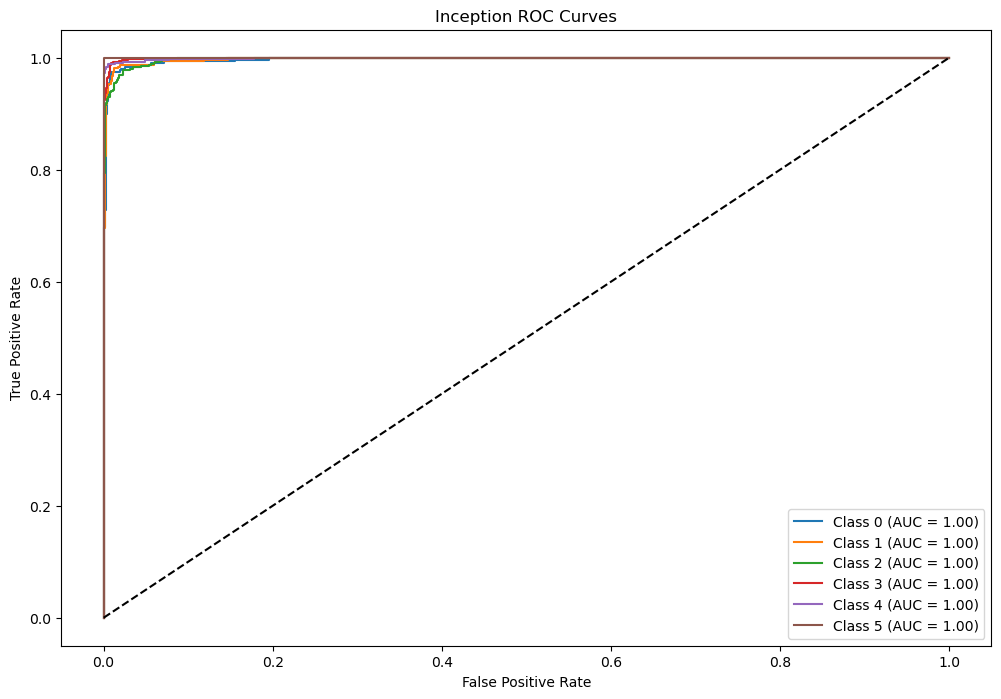

In [ ]:
# Plot ROC for Inception
plot_roc_curve(y_test, y_pred_incept_prob, 'Inception')

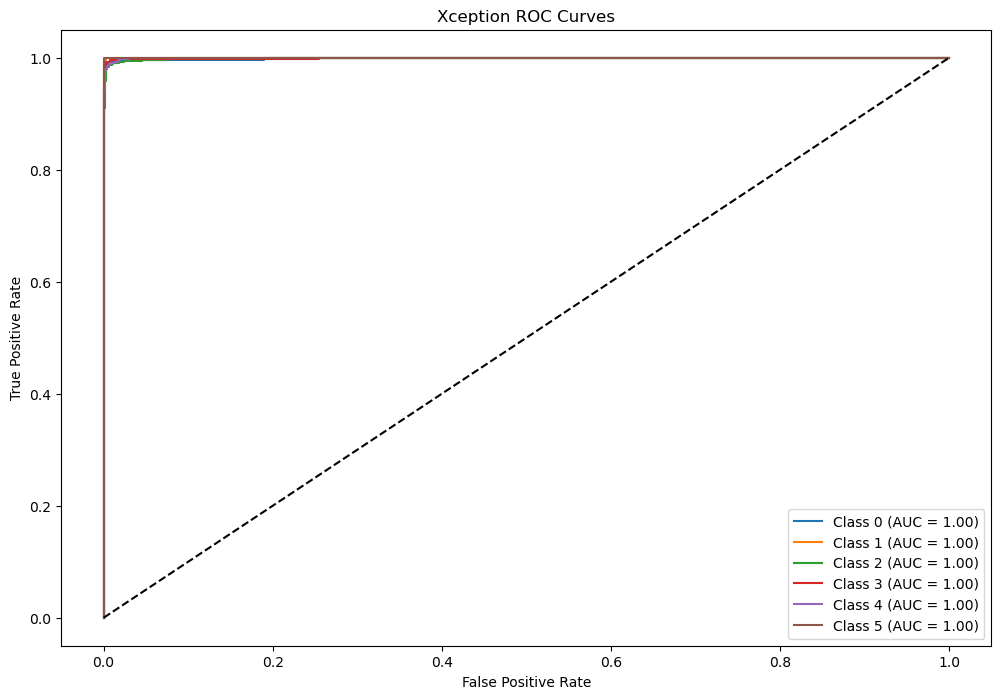

In [ ]:
# Plot ROC for Xception
plot_roc_curve(y_test, y_pred_xcept_prob, 'Xception')

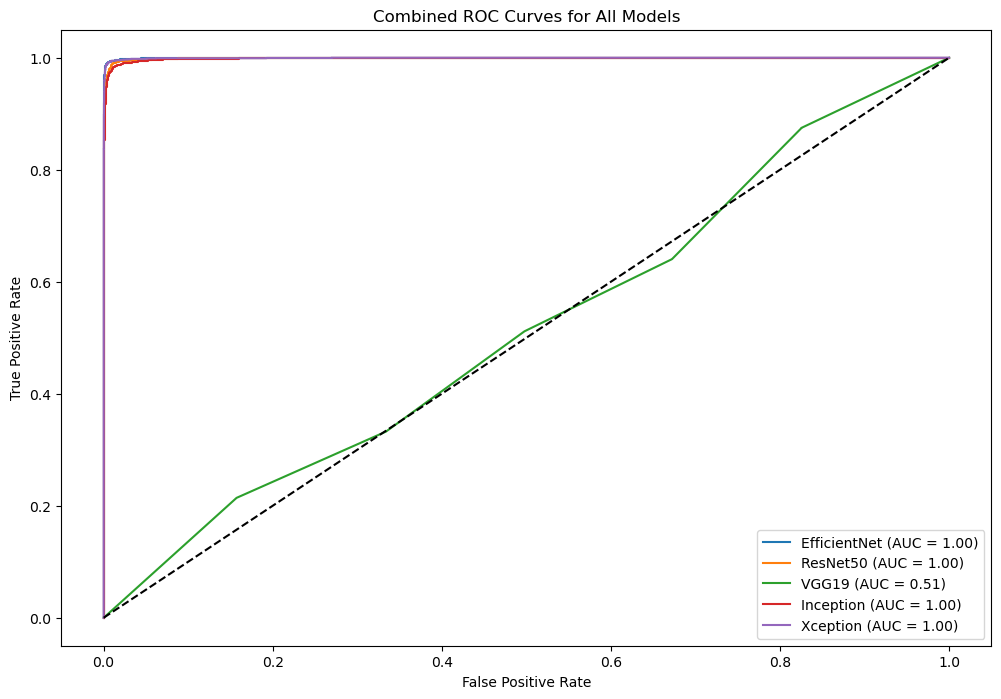

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output (if not already one-hot encoded)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])  # Adjust the class list based on your classes

# Plotting ROC curves for all models combined
def plot_combined_roc_curve_overall(y_true, model_probs, model_names):
    plt.figure(figsize=(12, 8))

    # Loop through each model
    for model_name, y_pred_prob in zip(model_names, model_probs):
        # Calculate ROC curve and AUC for the whole model
        fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred_prob.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
    plt.title('Combined ROC Curves for All Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Model names
model_names = ['EfficientNet', 'ResNet50', 'VGG19', 'Inception', 'Xception']

# Model probability predictions
model_probs = [y_pred_effnet_prob, y_pred_resnet_prob, y_pred_vgg_prob, y_pred_incept_prob, y_pred_xcept_prob]

# Plot the combined ROC curve for the entire model
plot_combined_roc_curve_overall(y_test_bin, model_probs, model_names)

### **Conclusion**

In the analysis, the implementation and evaluation five deep learning models—EfficientNetB7, ResNet50, VGG19, Inception (GoogLeNet), and Xception—on a classification task for predicting air quality based on image data. The results demonstrate significant variance in performance across models.

EfficientNetB7 stood out with the highest F1-Score (0.9894) and a perfect specificity (1.0), making it the most reliable model in both prediction accuracy and avoiding false positives. Xception also performed strongly, with an F1-Score of 0.9853 and specificity close to perfect (0.9934), followed closely by Inception with comparable performance metrics. ResNet50 displayed robust performance with an F1-Score of 0.9658 and a decent specificity of 0.9408. However, VGG19 struggled significantly, showing poor F1-Score (0.0293) and specificity (0.0).

In terms of mean squared error (MSE), mean absolute error (MAE), and root mean square error (RMSE), EfficientNetB7 again proved the most effective, exhibiting the lowest error values, with Xception and Inception following closely behind. ResNet50 also maintained reasonable error metrics, while VGG19's high error values underscored its difficulty in accurately predicting the air quality classes.